In [24]:
from opentargets import OpenTargetsClient
import pandas as pd
import os
import matplotlib.pyplot as plt
from sys import platform 
prefix = 'G:' if platform == 'win32' else '/Volumes/GoogleDrive'

# Load critical gene lists (with subselection method)

In [26]:
critical_gene_path = prefix + '/Shared drives/NIAAA_ASSIST/Data/feature_extraction_derived/'
critical_gene_dfs = []
embedding_names = []
for file in os.listdir(critical_gene_path):
    if file.startswith('module') and file.endswith('.csv'):
        df = pd.read_csv(critical_gene_path + '/' + file)
        critical_gene_dfs.append(df)
        embedding_names.append('_'.join(file.split('_')[:3]))

In [21]:
client = OpenTargetsClient()
response = client.filter_associations()

756 Results found | parameters: {'size': 1000, 'target': 'ENSG00000157764', 'scorevalue_min': 0.8}

In [110]:
cg_lists1 = []
for i in range(5):
    cg_lists1 += [gene for gene in critical_gene_dfs[i]['gene'][:20]]

In [138]:
neuro_dict1 = {}
for gene in cg_lists1:
    cnt = 0
    response.filter(target = gene, scorevalue_min = 0.7)
    for r in response:
        if ('nervous' in r['disease']['efo_info']['label'].lower()) or ('neuro' in r['disease']['efo_info']['label'].lower()):
            cnt += 1
    if cnt > 0:
        gene = r['target']['gene_info']['symbol']
        neuro_dict1[gene] = cnt

In [166]:
len(neuro_dict1)

22

In [163]:
from collections import OrderedDict
def plot_target_disease(disease_dict):
    plt.figure(figsize = (len(disease_dict)/3.5,4))
    sorted_dict = dict(sorted(disease_dict.items(), key = lambda x:x[1], reverse=True))
    plt.bar(sorted_dict.keys(), sorted_dict.values())
    plt.xticks(rotation = 45, ha = 'right')
    plt.ylabel('# associated neuro diseases')
    plt.title('Open target search')

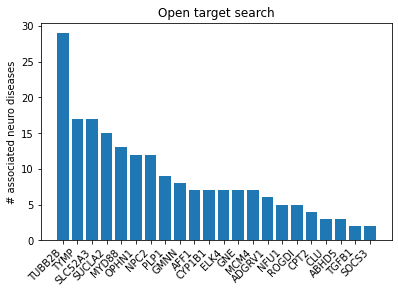

In [164]:
plot_target_disease(neuro_dict1)

# Load critical gene list (with whole network embedding method)

In [85]:
critical_gene_df = pd.read_csv(prefix + '/Shared drives/NIAAA_ASSIST/Data/feature_extraction_derived/epoch=100_alpha=0.1_critical_gene_df.csv')

In [161]:
neuro_dict2 = {}
cg_list2 = critical_gene_df['gene'][:100]
for gene in cg_list2:
    cnt = 0
    response.filter(target = gene, scorevalue_min = 0.7)
    for r in response:
        if ('nervous' in r['disease']['efo_info']['label'].lower()) or ('neuro' in r['disease']['efo_info']['label'].lower()):
            cnt += 1
    if cnt > 0:
        gene = r['target']['gene_info']['symbol']
        neuro_dict2[gene] = cnt

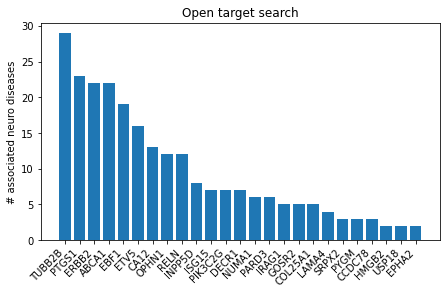

In [165]:
plot_target_disease(neuro_dict2)